# Overview plots of SIA, SIE, SIV, SIC and SIT

### Author: Chris Wyburn-Powell, [github](https://github.com/chrisrwp/synthetic-ensemble/SIA/SIA_figures_not_resampled.ipynb)

**Input**: <br>
Sea ice area, extent and volume (SIA, SIE, SIV) calculated [here](https://github.com/chrisrwp/synthetic-ensemble/SIA/SIC_to_SIA_models.ipynb), before any resampling has taken place, for 6 CLIVAR LE models. <br>

**Output**: <br>
Figures showing overviews of the SIA, SIE, SIV, SIC and SIT for the 6 selected CLIVAR models

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [4]:
data_path = '/glade/scratch/cwpowell/Synthetic_ensemble/'

model_names  = ['CanESM2', 'CESM1', 'CSIRO_MK36', 'GFDL_CM3', 'GFDL_ESM2M', 'MPI_ESM1' ]
mem_len      = [50,        40,      30,           20,         30,           100        ]
model_starts = [1950,      1920,    1850,         1920,       1950,         1850       ]
colors       = ['m',       'b',     'g',          'orange',   'k',          'tab:olive']

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

## Load the SIA time series from CLIVAR models and observations

In [13]:
#models
SIA = xr.open_dataset(data_path+'SIA/SIA_SIE_SIV/CLIVAR_SIA_1850_2100_RCP85.nc')

#observations
CDR  = xr.open_dataset(data_path+'Raw_data/observations/NSIDC_CDR_v4/SIA_SIE_CDR_BT_NT_79-20_filled.nc')
SII      = xr.open_dataset(data_path+'Raw_data/observations/NSIDC_sea_ice_index_v3/NSIDC_sea_ice_index_SIA_SIE_79-20_filled_including_pole_hole.nc')
HadISST1 = xr.open_dataset(data_path+'Raw_data/observations/HadISST/HadISST1_SIA_SIE_79-20_filled.nc')
Merged   = xr.open_dataset(data_path+'Raw_data/observations/merged_Hadley_OI/merged_Hadley_OI_SIA_SIE_79-20.nc')

obs_SIA = xr.Dataset({'CDR':CDR['CDR_SIA'].copy(), 'BT':CDR['BT_SIA'].copy(), 'NT':CDR['NT_SIA'].copy(), 
                     'SII':SII['SIA'].copy(), 'HadISST1':HadISST1['SIA'].copy(), 'Merged':Merged['SIA'].copy()})

# Plot time series of SIA, SIE and SIV

In [6]:
obs_mean = (obs_SIA['CDR'] + obs_SIA['BT'] + obs_SIA['NT'] + obs_SIA['SII'] + obs_SIA['HadISST1'] + obs_SIA['Merged']) / 6

obs_coords = xr.concat((obs_SIA['CDR'], obs_SIA['BT'], obs_SIA['NT'], obs_SIA['SII'], obs_SIA['HadISST1'], obs_SIA['Merged']), dim='dataset')
obs_coords['dataset'] = list(obs_SIA.keys())

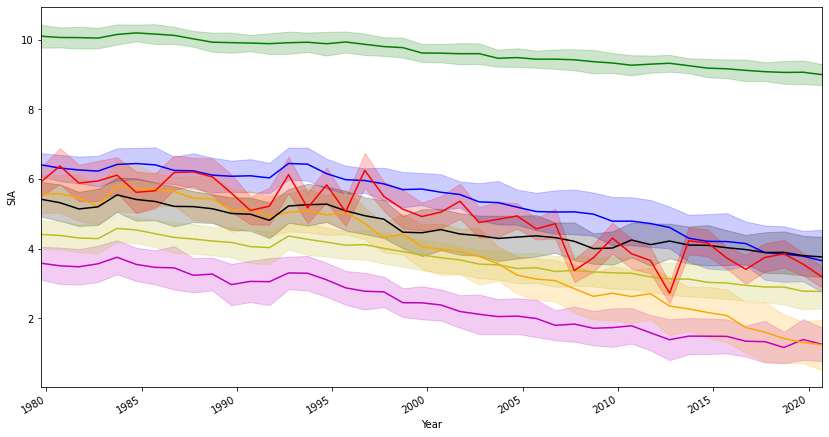

In [11]:
month_ = 9

plt.figure(figsize=[14,7])

for model_i, model_name in enumerate(model_names[:6]):
    model_data = SIA[model_name].sel(time=SIA['time.month']==month_).sel(time=slice('1979','2020'))
    
    model_data.mean('member').plot(c=colors[model_i])
    plt.fill_between(model_data['time'], model_data.mean('member') - model_data.std('member'), 
                     model_data.mean('member') + model_data.std('member'), color=colors[model_i], alpha=0.2)

obs_data = obs_coords.sel(time=obs_coords['time.month']==9)

obs_data.mean('dataset').plot(c='r')
plt.fill_between(obs_data['time'], obs_data.mean('dataset') - obs_data.std('dataset'),
                 obs_data.mean('dataset') + obs_data.std('dataset'), color='r', alpha=0.2)


plt.xlim(obs_data['time'].min(), obs_data['time'].max())
plt.ylabel('SIA')
plt.xlabel('Year');

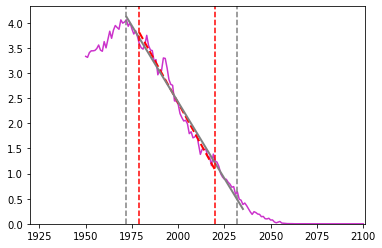

In [55]:
month_ = 9
data = SIA['CanESM2'].sel(time=SIA['time.month']==month_).mean('member')

plt.plot(np.arange(1950,2101), data[~np.isnan(data)], c=colors[0], alpha=0.8)

coefs = np.polyfit(np.arange(1979,2021), data.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='r', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(1972,2036), data.sel(time=slice('1972','2035')),1)
plt.plot(np.arange(1972,2036), coefs[0]*np.arange(1972,2036) + coefs[1], c='0.5', linewidth=2)
plt.axvline(1972, c='0.5', linestyle='--')
plt.axvline(2032, c='0.5', linestyle='--')
plt.axvline(1979, c='r', linestyle='--')
plt.axvline(2020, c='r', linestyle='--')
plt.ylim(bottom=0);
plt.xlim(1920,2101);

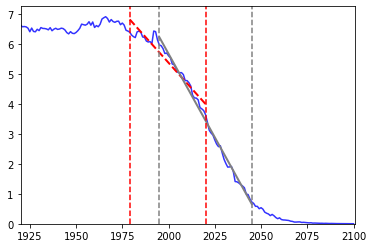

In [54]:
data = SIA['CESM1'].sel(time=SIA['time.month']==month_).mean('member').sel(time=slice('1920','2101'))

plt.plot(np.arange(1920,2101), data, c=colors[1], alpha=0.8)

coefs = np.polyfit(np.arange(1979,2021), data.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='r', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(1995,2046), data.sel(time=slice('1995','2045')),1)
plt.plot(np.arange(1995,2046), coefs[0]*np.arange(1995,2046) + coefs[1], c='0.5', linewidth=2)
plt.axvline(1995, c='0.5', linestyle='--')
plt.axvline(2045, c='0.5', linestyle='--')
plt.axvline(1979, c='r', linestyle='--')
plt.axvline(2020, c='r', linestyle='--')
plt.ylim(bottom=0);
plt.xlim(1920,2101);

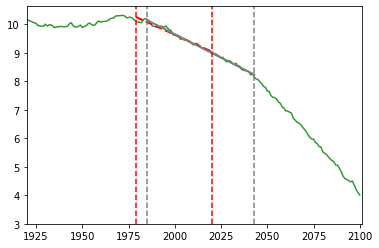

In [74]:
data = SIA['CSIRO_MK36'].sel(time=SIA['time.month']==month_).mean('member').sel(time=slice('1920','2101'))

plt.plot(np.arange(1920,2101), data, c=colors[2], alpha=0.8)

coefs = np.polyfit(np.arange(1979,2021), data.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='r', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(1985,2044), data.sel(time=slice('1985','2043')),1)
plt.plot(np.arange(1985,2044), coefs[0]*np.arange(1985,2044) + coefs[1], c='0.5', linewidth=2)
plt.axvline(1985, c='0.5', linestyle='--')
plt.axvline(2043, c='0.5', linestyle='--')
plt.axvline(1979, c='r', linestyle='--')
plt.axvline(2020, c='r', linestyle='--')
plt.ylim(bottom=3);
plt.xlim(1920,2101);

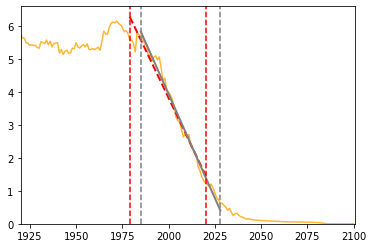

In [65]:
data = SIA['GFDL_CM3'].sel(time=SIA['time.month']==month_).mean('member').sel(time=slice('1920','2101'))

plt.plot(np.arange(1920,2101), data, c=colors[3], alpha=0.8)

coefs = np.polyfit(np.arange(1979,2021), data.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='r', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(1985,2029), data.sel(time=slice('1985','2028')),1)
plt.plot(np.arange(1985,2029), coefs[0]*np.arange(1985,2029) + coefs[1], c='0.5', linewidth=2)
plt.axvline(1985, c='0.5', linestyle='--')
plt.axvline(2028, c='0.5', linestyle='--')
plt.axvline(1979, c='r', linestyle='--')
plt.axvline(2020, c='r', linestyle='--')
plt.ylim(bottom=0);
plt.xlim(1920,2101);

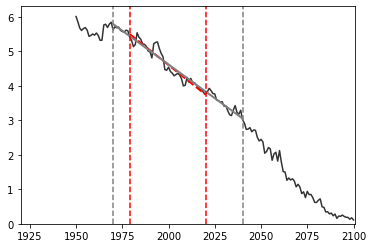

In [68]:
data = SIA['GFDL_ESM2M'].sel(time=SIA['time.month']==month_).mean('member').sel(time=slice('1920','2101'))

plt.plot(np.arange(1920,2101), data, c=colors[4], alpha=0.8)

coefs = np.polyfit(np.arange(1979,2021), data.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='r', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(1970,2041), data.sel(time=slice('1970','2040')),1)
plt.plot(np.arange(1970,2041), coefs[0]*np.arange(1970,2041) + coefs[1], c='0.5', linewidth=2)
plt.axvline(1970, c='0.5', linestyle='--')
plt.axvline(2040, c='0.5', linestyle='--')
plt.axvline(1979, c='r', linestyle='--')
plt.axvline(2020, c='r', linestyle='--')
plt.ylim(bottom=0);
plt.xlim(1920,2101);

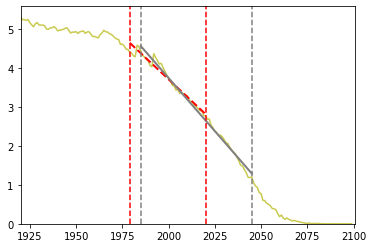

In [71]:
data = SIA['MPI_ESM1'].sel(time=SIA['time.month']==month_).mean('member').sel(time=slice('1920','2101'))

plt.plot(np.arange(1920,2101), data, c=colors[5], alpha=0.8)

coefs = np.polyfit(np.arange(1979,2021), data.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='r', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(1985,2046), data.sel(time=slice('1985','2045')),1)
plt.plot(np.arange(1985,2046), coefs[0]*np.arange(1985,2046) + coefs[1], c='0.5', linewidth=2)
plt.axvline(1985, c='0.5', linestyle='--')
plt.axvline(2045, c='0.5', linestyle='--')
plt.axvline(1979, c='r', linestyle='--')
plt.axvline(2020, c='r', linestyle='--')
plt.ylim(bottom=0);
plt.xlim(1920,2101);

# March

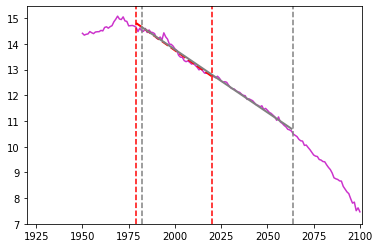

In [94]:
month_ = 3
data = SIA['CanESM2'].sel(time=SIA['time.month']==month_).mean('member')

plt.plot(np.arange(1950,2101), data[~np.isnan(data)], c=colors[0], alpha=0.8)

coefs = np.polyfit(np.arange(1979,2021), data.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='r', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(1982,2064), data.sel(time=slice('1982','2063')),1)
plt.plot(np.arange(1982,2064), coefs[0]*np.arange(1982,2064) + coefs[1], c='0.5', linewidth=2)
plt.axvline(1982, c='0.5', linestyle='--')
plt.axvline(2064, c='0.5', linestyle='--')
plt.axvline(1979, c='r', linestyle='--')
plt.axvline(2020, c='r', linestyle='--')
plt.ylim(bottom=7);
plt.xlim(1920,2101);

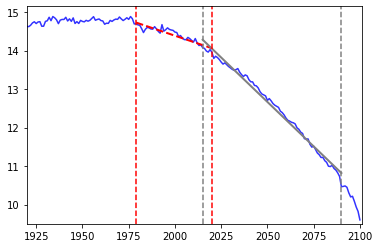

In [166]:
data = SIA['CESM1'].sel(time=SIA['time.month']==month_).mean('member').sel(time=slice('1920','2101'))

plt.plot(np.arange(1920,2101), data, c=colors[1], alpha=0.8)

coefs = np.polyfit(np.arange(1979,2021), data.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='r', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(2015,2091), data.sel(time=slice('2015','2090')),1)
plt.plot(np.arange(2015,2091), coefs[0]*np.arange(2015,2091) + coefs[1], c='0.5', linewidth=2)
plt.axvline(2015, c='0.5', linestyle='--')
plt.axvline(2090, c='0.5', linestyle='--')
plt.axvline(1979, c='r', linestyle='--')
plt.axvline(2020, c='r', linestyle='--')
plt.ylim(bottom=9.5);
plt.xlim(1920,2101);

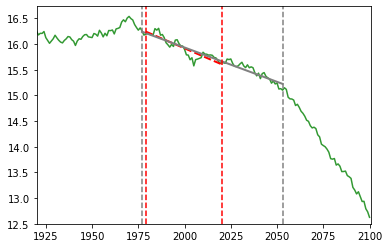

In [168]:
data = SIA['CSIRO_MK36'].sel(time=SIA['time.month']==month_).mean('member').sel(time=slice('1920','2101'))

plt.plot(np.arange(1920,2101), data, c=colors[2], alpha=0.8)

coefs = np.polyfit(np.arange(1979,2021), data.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='r', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(1977,2054), data.sel(time=slice('1977','2053')),1)
plt.plot(np.arange(1977,2054), coefs[0]*np.arange(1977,2054) + coefs[1], c='0.5', linewidth=2)
plt.axvline(1977, c='0.5', linestyle='--')
plt.axvline(2053, c='0.5', linestyle='--')
plt.axvline(1979, c='r', linestyle='--')
plt.axvline(2020, c='r', linestyle='--')
plt.ylim(bottom=12.5);
plt.xlim(1920,2101);

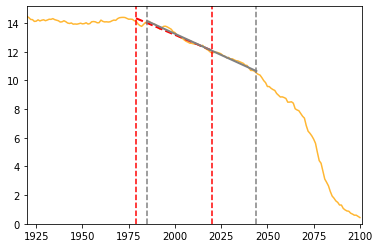

In [170]:
data = SIA['GFDL_CM3'].sel(time=SIA['time.month']==month_).mean('member').sel(time=slice('1920','2101'))

plt.plot(np.arange(1920,2101), data, c=colors[3], alpha=0.8)

coefs = np.polyfit(np.arange(1979,2021), data.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='r', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(1985,2045), data.sel(time=slice('1985','2044')),1)
plt.plot(np.arange(1985,2045), coefs[0]*np.arange(1985,2045) + coefs[1], c='0.5', linewidth=2)
plt.axvline(1985, c='0.5', linestyle='--')
plt.axvline(2044, c='0.5', linestyle='--')
plt.axvline(1979, c='r', linestyle='--')
plt.axvline(2020, c='r', linestyle='--')
plt.ylim(bottom=0);
plt.xlim(1920,2101);

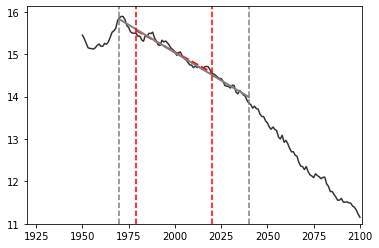

In [108]:
data = SIA['GFDL_ESM2M'].sel(time=SIA['time.month']==month_).mean('member').sel(time=slice('1920','2101'))

plt.plot(np.arange(1920,2101), data, c=colors[4], alpha=0.8)

coefs = np.polyfit(np.arange(1979,2021), data.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='r', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(1970,2041), data.sel(time=slice('1970','2040')),1)
plt.plot(np.arange(1970,2041), coefs[0]*np.arange(1970,2041) + coefs[1], c='0.5', linewidth=2)
plt.axvline(1970, c='0.5', linestyle='--')
plt.axvline(2040, c='0.5', linestyle='--')
plt.axvline(1979, c='r', linestyle='--')
plt.axvline(2020, c='r', linestyle='--')
plt.ylim(bottom=11);
plt.xlim(1920,2101);

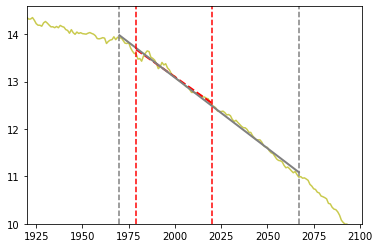

In [175]:
data = SIA['MPI_ESM1'].sel(time=SIA['time.month']==month_).mean('member').sel(time=slice('1920','2101'))

plt.plot(np.arange(1920,2101), data, c=colors[5], alpha=0.8)

coefs = np.polyfit(np.arange(1979,2021), data.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='r', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(1970,2068), data.sel(time=slice('1970','2067')),1)
plt.plot(np.arange(1970,2068), coefs[0]*np.arange(1970,2068) + coefs[1], c='0.5', linewidth=2)
plt.axvline(1970, c='0.5', linestyle='--')
plt.axvline(2067, c='0.5', linestyle='--')
plt.axvline(1979, c='r', linestyle='--')
plt.axvline(2020, c='r', linestyle='--')
plt.ylim(bottom=10);
plt.xlim(1920,2101);

# Observations

In [7]:
HadISST1_areas = xr.open_dataset(data_path+'Raw_data/observations/HadISST/HadISST_ice_area.nc')
HadISST1_SIC = xr.open_dataset(data_path+'Raw_data/observations/HadISST/HadISST_ice.nc')

HadISST_NH = HadISST1_SIC['sic'].where(HadISST1_SIC['latitude']>30, drop=True)

HadISST_SIA = []
for month_ in np.arange(1,13):
    HadISST_SIA.append((HadISST_NH.sel(time=HadISST_NH['time.month']==month_) * HadISST1_areas.where(HadISST1_areas['latitude']>30,drop=True)).sum('latitude').sum('longitude'))
    
HadISST_SIA = xr.concat(HadISST_SIA, dim='time')
HadISST_SIA = HadISST_SIA/1e12
HadISST_SIA = HadISST_SIA.rename({'cell_area': 'SIA'})
HadISST_SIA = HadISST_SIA.sortby('time')

HadISST1_SIA_79_20 = xr.open_dataset(data_path+'Raw_data/observations/HadISST/HadISST1_SIA_SIE_79-20_filled.nc')

Had_SIA = xr.concat((HadISST_SIA.sel(time=slice('1920-01', '1999-12')), HadISST1_SIA_79_20.sel(time=slice('2000-01','2020-12'))), dim='time')
Had_SIA = Had_SIA['SIA']

In [8]:
         # Jan,  Feb,  Mar,  Apr,  May,  Jun,  Jul,  Aug,  Sep,  Oct,  Nov,  Dec
starts = [1953, 1953, 1953, 1953, 1953, 1953, 1952, 1963, 1965, 1965, 1965, 1955]
ends   = [2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]

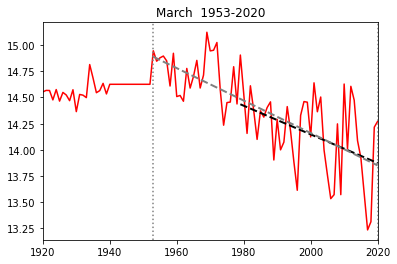

In [12]:
month_ = 3
obs_SIA = Had_SIA.sel(time=Had_SIA['time.month']==month_)

plt.plot(np.arange(1920,2021), obs_SIA, c='r')

coefs = np.polyfit(np.arange(1979,2021), obs_SIA.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='k', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(starts[month_-1],ends[month_-1]+1), obs_SIA.sel(time=slice(str(starts[month_-1]),str(ends[month_-1]))),1)
plt.plot(np.arange(starts[month_-1],ends[month_-1]+1), coefs[0]*np.arange(starts[month_-1],ends[month_-1]+1) + coefs[1], c='0.5', linewidth=2, linestyle='--')
plt.axvline(starts[month_-1], c='0.5', linestyle='dotted')
plt.axvline(ends[month_-1], c='0.5', linestyle='dotted')
plt.xlim(1920,2020)
plt.title(month_names[month_-1]+'  '+str(starts[month_-1])+'-'+str(ends[month_-1]));

In [ ]:
month_ = 3

obs_SIA['CDR'].sel(time=obs_SIA['time.month']==month_).plot(label='CDR')
obs_SIA['BT'].sel(time=obs_SIA['time.month']==month_).plot(label='BT')
obs_SIA['NT'].sel(time=obs_SIA['time.month']==month_).plot(label='NT')
obs_SIA['SII'].sel(time=obs_SIA['time.month']==month_).plot(label='SII')
obs_SIA['HadISST1'].sel(time=obs_SIA['time.month']==month_).plot(label='HadISST1')
obs_SIA['Merged'].sel(time=obs_SIA['time.month']==month_).plot(label='Hadley OI')

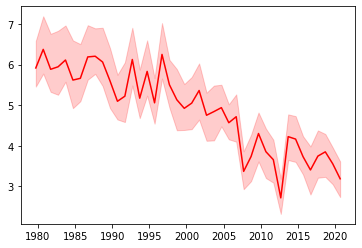

In [27]:
#plot observational uncertainty from different datasets
plt.plot(obs_mean['time'].sel(time=obs_mean['time.month']==9), obs_mean.sel(time=obs_mean['time.month']==9), c='r')
plt.fill_between(obs_mean['time'].sel(time=obs_mean['time.month']==9),
                 obs_coords.sel(time=obs_coords['time.month']==9).min('dataset'),
                 obs_coords.sel(time=obs_coords['time.month']==9).max('dataset'), color='r', alpha=0.2)

# Observations jacknife trends

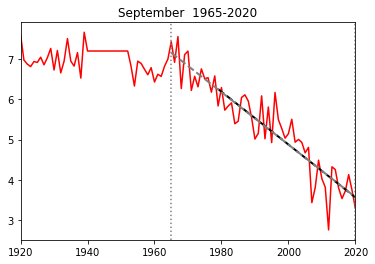

In [32]:
month_ = 9
SIA_obs = Had_SIA.sel(time=Had_SIA['time.month']==month_)

plt.plot(np.arange(1920,2021), SIA_obs, c='r')

coefs = np.polyfit(np.arange(1979,2021), SIA_obs.sel(time=slice('1979','2020')),1)
plt.plot(np.arange(1979,2021), coefs[0]*np.arange(1979,2021) + coefs[1], c='k', linewidth=2, linestyle='--')

coefs = np.polyfit(np.arange(starts[month_-1],ends[month_-1]+1), SIA_obs.sel(time=slice(str(starts[month_-1]),str(ends[month_-1]))),1)
plt.plot(np.arange(starts[month_-1],ends[month_-1]+1), coefs[0]*np.arange(starts[month_-1],ends[month_-1]+1) + coefs[1], c='0.5', linewidth=2, linestyle='--')
plt.axvline(starts[month_-1], c='0.5', linestyle='dotted')
plt.axvline(ends[month_-1], c='0.5', linestyle='dotted')
plt.xlim(1920,2020)
plt.title(month_names[month_-1]+'  '+str(starts[month_-1])+'-'+str(ends[month_-1]));

In [31]:
#delete a single value from the array
np_09 = np.array(obs_SIA_09.copy())
np_09_dates = np.arange(1965,2021)

all_coefs = np.empty((len(obs_SIA_09),2))

for i in range(len(obs_SIA_09)):
    temp_SIA = np.delete(np_09.copy(), i)
    temp_dates = np.delete(np_09_dates.copy(), i)
    
    all_coefs[i] = np.polyfit(temp_dates, temp_SIA, 1)
    

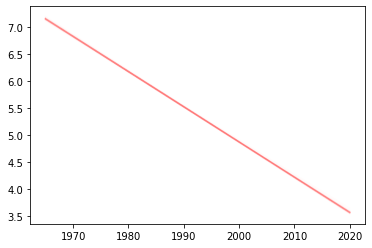

In [37]:
for coef in all_coefs:
    plt.plot(np_09_dates, np_09_dates*coef[0] + coef[1], c='r', alpha=0.01)

In [18]:
#delete a number of values from the time series at random
len_rand = 45
n_jacknife = 100

np_09 = np.array(Had_SIA.sel(time=Had_SIA['time.month']==month_).sel(time=slice('1965','2020')).copy())
np_09_dates = np.arange(1965,2021)

all_coefs = np.empty((n_jacknife,2))

for i in range(n_jacknife):
    rand_ints = np.random.default_rng().choice(len(np_09), size=len_rand, replace=False)
    temp_SIA = np.delete(np_09.copy(), rand_ints)
    temp_dates = np.delete(np_09_dates.copy(), rand_ints)
    
    all_coefs[i] = np.polyfit(temp_dates, temp_SIA, 1)

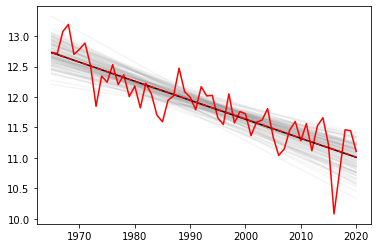

In [26]:
for coef in all_coefs:
    plt.plot(np_09_dates, np_09_dates*coef[0] + coef[1], c='0.5', alpha=0.08)
    
plt.plot(np_09_dates, np_09, c='r')
mean_coefs = np.mean(all_coefs, axis=0)
plt.plot(np_09_dates, np_09_dates*mean_coefs[0] + mean_coefs[1], c='k')

actual_coefs = np.polyfit(np_09_dates, np_09, 1)
plt.plot(np_09_dates, np_09_dates*actual_coefs[0] + actual_coefs[1], c='r', linestyle='--')

In [11]:
SIA

<xarray.DataArray 'SIA' (time: 101)>
array([14.5534409 , 14.56756568, 14.56647541, 14.47696715, 14.57550535,
       14.46533165, 14.54830138, 14.5236706 , 14.46955308, 14.57381947,
       14.36498204, 14.52890767, 14.52202674, 14.49851335, 14.81417902,
       14.68543527, 14.54552742, 14.56540334, 14.63470947, 14.53378977,
       14.62581576, 14.62581576, 14.62581576, 14.62581576, 14.62581576,
       14.62581576, 14.62581576, 14.62581576, 14.62581576, 14.62581576,
       14.62581576, 14.62581576, 14.62581576, 14.94585374, 14.84618412,
       14.87865821, 14.89539692, 14.84889239, 14.60946441, 14.92194137,
       14.50863527, 14.51936186, 14.46392565, 14.77727618, 14.58992428,
       14.70076258, 14.85398107, 14.59029964, 14.7140544 , 15.12260684,
       14.94466821, 14.95070226, 15.02470476, 14.57115629, 14.23546727,
       14.45108421, 14.45641221, 14.79353776, 14.43811958, 14.9049753 ,
       14.53844528, 14.15713413, 14.61151971, 14.37366755, 14.10002469,
       14.37232994, 14.31275942, 14.40381488, 14.45808888, 13.90332016,
       14.29136554, 14.00023118, 14.0737539 , 14.41286353, 14.17802105,
       13.88260996, 13.61439664, 14.32878256, 14.46097413, 14.45496767,
       14.12370659, 14.63972887, 14.36394168, 14.50431305, 13.99781479,
       13.76114969, 13.53430108, 13.5724327 , 14.24801743, 13.5724327 ,
       14.62833224, 14.00973734, 14.60639489, 14.47450028, 14.08759791,
       13.92421566, 13.57871734, 13.23593834, 13.31419945, 14.2166282 ,
       14.27210057])
Coordinates:
  * time     (time) datetime64[ns] 1920-03-16T12:00:00 ... 2020-03-16T12:00:00

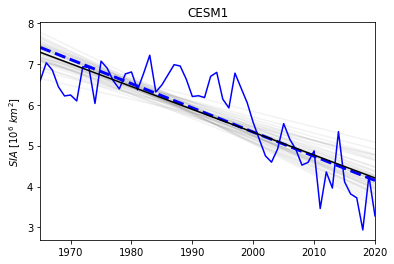

In [16]:
#compare MPI september from one member and plot all of the trends from each of the members 
model_name = 'CESM1'
mem_len = 40
mem_i = 1


np_09_dates = np.arange(1965,2021)

for i in range(mem_len):
    mem_SIA = SIA[model_name].sel(time=SIA['time.month']==9).sel(time=slice('1965','2020')).isel(member=i)
    coefs = np.polyfit(np_09_dates, mem_SIA.values, 1)
    
    plt.plot(np_09_dates, np_09_dates*coefs[0] + coefs[1], c='0.5', alpha=0.1)
    
plt.plot(np_09_dates, SIA[model_name].sel(time=SIA['time.month']==9).sel(time=slice('1965','2020')).sel(member=1), color=colors[mem_i])

mem_coef = np.polyfit(np_09_dates, SIA[model_name].sel(time=SIA['time.month']==9).sel(time=slice('1965','2020')).sel(member=1).values, 1)
plt.plot(np_09_dates, np_09_dates*mem_coef[0] + mem_coef[1], c=colors[mem_i], linestyle='--', linewidth=3)

ens_mean = SIA[model_name].sel(time=SIA['time.month']==9).sel(time=slice('1965','2020')).mean('member')
ens_coefs = np.polyfit(np_09_dates, ens_mean, 1)
plt.plot(np_09_dates, np_09_dates*ens_coefs[0] + ens_coefs[1], c='k')

plt.xlim(1965, 2020)
plt.ylabel(r'$SIA \ [10^6 \ km^2]$')
plt.title(model_name);

In [ ]:
#now want to plot the actual trend of the MPI member and the ensemble mean trend

# Observations in comparison to members

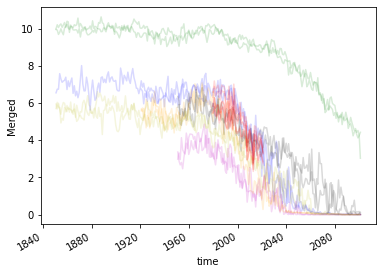

In [8]:
# plt.figure(figsize=10,5)
month_ = 9

for model_i, model_name in enumerate(model_names):
    for i in range(2):#range(mem_len[model_i]):
        SIA[model_name].isel(member=i).sel(time=SIA['time.month']==month_).plot(c=colors[model_i], alpha=0.15)

for data_var in list(obs_SIA.keys()):
    obs_SIA[data_var].sel(time=obs_SIA['time.month']==month_).plot(c='r', alpha=0.15)

# plt.xlim(SIA['time'].sel(time='1979-01'), SIA['time'].sel(time='2020-12'))    
# plt.ylabel(r'$Sea \ Ice \ Area \ [10^6 \ km^3]$')
# plt.xlabel('Time')
# plt.ylim(bottom=0)
# plt.axhline(1, c='0.5', linestyle='--')
# plt.title('Historical and RCP8.5 Arctic Sea Ice Area')

In [ ]:
# plt.figure(figsize=10,5)
month_ = 9

for model_i, model_name in enumerate(model_names):
    for i in range(100):#range(mem_len[model_i]):
        SIA[model_name].isel(member=i).sel(time=SIA['time.month']==month_).plot(c=colors[model_i], alpha=0.15)

for data_var in list(obs_SIA.keys()):
    obs_SIA[data_var].sel(time=obs_SIA['time.month']==month_).plot(c='r', alpha=0.15)

# plt.xlim(SIA['time'].sel(time='1979-01'), SIA['time'].sel(time='2020-12'))    
# plt.ylabel(r'$Sea \ Ice \ Area \ [10^6 \ km^3]$')
# plt.xlabel('Time')
# plt.ylim(bottom=0)
# plt.axhline(1, c='0.5', linestyle='--')
# plt.title('Historical and RCP8.5 Arctic Sea Ice Area')

# Calculate and plot median ice edge

In [12]:
CanESM2_01 = load_member('CanESM2', 1, 'sic')

In [6]:
CanESM2_01['sic'].sel(time='2020-09').plot(levels=[0,15,100])